In [2]:
import cleaner as cl              #libreria creata per eseguire operazioni su dati
import imageMC as imgMC           #libreria creata per trattare le immagini
import operazioni as op           #libreria creata con alcune operazioni
%matplotlib inline


ModuleNotFoundError: No module named 'matplotlib'

In [1]:
from keras.models import Sequential    #librerie per CNN
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.layers.core import Dense, Activation
from keras import layers
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras import optimizers



from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


ModuleNotFoundError: No module named 'keras'

In [29]:
x=cl.csv_to_matrix('2000.csv',';') #lettura dataset e lo si trasforma in una matrice 
x=cl.reshape(x,1)                  #si converte la matrice (n.m) in una matrice (n*m,1)

k=['2001.csv','2002.csv','2003.csv','2004.csv','2005.csv','2006.csv','2007.csv']
for i in k:
    y=cl.csv_to_matrix(i,';')
    y=cl.reshape(y,1)
    x=cl.append_matrix(x,y)       #si uniscono le matrici per colonna

x.shape


del k, y

In [30]:
len(x)

8617216

In [31]:

import numpy as np
x=x[x>0]



In [32]:
o=x
cl.divisori(o.shape[0]-60)       #indica quali numeri possono dividere un numero


1
2
3
4
6
8
12
16
24
32
37
48
64
74
96
111
148
192
222
296
444
592
888
1184
1213
1776
2368
2426
3552
3639
4852
7104
7278
9704
14556
19408
29112
38816
44881
58224
77632
89762
116448
134643
179524
232896
269286
359048
538572
718096
1077144
1436192
2154288
2872384
4308576
8617152


In [33]:
o=o[:-60]
y=cl.reshape(o,48)             #dividiamo la matrice (n,1) in una matrice (n/35, 35)


In [34]:
y.shape

(179524, 48)

In [35]:
y

array([[0.9302, 0.9302, 0.9302, ..., 0.9299, 0.9299, 0.9299],
       [0.93  , 0.93  , 0.93  , ..., 0.9298, 0.9298, 0.9298],
       [0.9299, 0.93  , 0.9299, ..., 0.9296, 0.9296, 0.9296],
       ...,
       [1.4596, 1.4597, 1.4596, ..., 1.4598, 1.4593, 1.4593],
       [1.4594, 1.4594, 1.4593, ..., 1.459 , 1.4589, 1.459 ],
       [1.4589, 1.4591, 1.4589, ..., 1.4589, 1.4589, 1.4589]])

In [36]:
x=y[:,0:30]
y1=y[:,31:42]
y2=y[:,43:48]

ultimo=x[:,x.shape[1]-1]
ultimo


array([0.9299, 0.9296, 0.9299, ..., 1.4595, 1.4592, 1.4589])

In [37]:
y2[1000].mean()

0.9390599999999999

In [38]:
#for i in range(len(y2)):
#    y2[i] -= ultimo[i]

#y3=np.zeros(x.shape[0])

#j=0
#for i in range(0,len(y2)):
#    if np.abs(y2[i].max())>np.abs(y2[i].min()):
#        y3[i]=+1
#    elif np.abs(y2[i].max())<np.abs(y2[i].min()):
#        y3[i]=-1
        
#    else:
#        y3[i]=0
        

In [39]:

y3=np.zeros(x.shape[0])

j=0
for i in range(0,len(y2)):
    if y2[i].mean()>ultimo[i]:
        y3[i]=+1
    elif y2[i].mean()<ultimo[i]:
        y3[i]=-1
        
    else:
        y3[i]=0

In [40]:
y3

array([ 1.,  1., -1., ...,  1., -1., -1.])

array([ 40, -40])

In [23]:
x.shape

(179524, 30)

In [24]:
x=np.log(x)
x=np.diff(x)

In [25]:
x.shape

(179524, 29)

In [26]:
x

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.07532663e-04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.07567364e-04,  0.00000000e+00],
       [ 1.07532663e-04, -1.07532663e-04,  1.07532663e-04, ...,
         0.00000000e+00,  1.07544228e-04,  0.00000000e+00],
       ...,
       [ 6.85095742e-05, -6.85095742e-05,  0.00000000e+00, ...,
         0.00000000e+00,  6.85236578e-05,  6.85189626e-05],
       [ 0.00000000e+00, -6.85236578e-05,  6.85236578e-05, ...,
         6.85283536e-05, -6.85283536e-05,  0.00000000e+00],
       [ 1.37080192e-04, -1.37080192e-04,  1.37080192e-04, ...,
         0.00000000e+00,  6.85471433e-05,  0.00000000e+00]])

In [114]:
#---------------------------OGGETTO PER LE TIME SERIES----------------------------


from rpy2.robjects import *
from rpy2.robjects import pandas2ri
import rpy2.robjects.numpy2ri
import json
import matplotlib.pyplot as plt
import numpy as np

pandas2ri.activate()

rpy2.robjects.numpy2ri.activate()

class Time_Series():
    
    """ This class calculates changepoints for variance or mean.
 
    Args:
    -----
        methods (list or String) >>> Set a list or a string of all methods.

    """    
    

    
    def __init__(self,methods):
        
                                                 #methods available in this class
        methods_av=['AMOC','BinSeg','SegNeigh','PELT','PROPHET','wbs','ecp','bcp'] 
        self.methods_av=methods_av                   
        
        if type(methods)!= list:                 #convert string to list of methods
            self.methods=[methods]
        else:
            self.methods=methods
            
            
            
        for method in self.methods:              #exception method isn't avalaible
            
            if method not in self.methods_av:     
                stringa=""
                for i in methods_av: 
                    stringa=stringa+i+", "
                    
                raise Exception("Il modello "+method+" non  è presente. Puoi scegliere tra "+stringa[:-1])        
        
        
    def get_libraries(self):
        list_methods = ['bcp', 'wbs', 'prophet', 'ecp', 'xts', 'changepoint', 'RJSONIO', 'hash']
        methods_necessary = []

        for name in list_methods:
            try:
                r('library({})'.format(name))
                print("The package '{}' is already installed.\n".format(name))
            except:
                methods_necessary.append(name)

        print("Missing Packages: ", methods_necessary)

        if len(methods_necessary)>0:
            decision = input("Do you want to continue with the installation of the missing packages? y/n: \n")

            if decision == 'y':
                for package in methods_necessary:
                    print(package)
                    try:
                        r("""install.packages("{}")
                            library({}) 
                            """.format(package, package))
                        print("The package '{}' has been successfully installed!".format(package))
                    except:
                        print("The package '{}' doesn't exist...".format(package))
            else:
                print("The installation has been interrupted...")

        else:
            print("No packages nedeed")
    
    
    
    def get_InfoLibrary(self,library):
         
         r('print(help('+library+'))')     #print the help of a library
        

        
    
    def CP_mean(self,df,penalty_bs="MBIC",penalty_wbs='MBIC',field='y',field_dt='ds',format_dt="%Y-%m-%d",
                     n_checkpoints=5,test_stat="Normal",minseqlen=1,n_intervals=5000, C_wbs = 1.3,
                     sig_lvl=0.05,R=199,min_size=30,alpha=1,p0=0.2,
                     threshold=0.99,growth='linear',changepoint_priorscale=0.05):
        """
        Args:
        -----
            df (pandas.DataFrame) >>> dataframe that contains at least a column with of dates and at least
            another numeric column.
            
            field (string) >>> name of the field (column) that contain numeric values.
            
            field_dt (string) >>> name of the field (column) that contain dates.
            
            format_dt (string) >>> date's format of the "field_dt" column
                        
                                    
            (!) For the methods "BinSeg", "PELT", "AMONG" and "SegNeigh":               

            -n_checkpoints (int) >>> maximum number of checkpoints. (no for AMONG and PELT)
           
            -penalty ("SIC","BIC","MBIC","AIC","Hannan-Quinn","CROPS")>>> kind of penalty.
            
            -test_stat ("Normal" or "CUSUM") The assumed test statistic / distribution of the data.
               
            -minseqlen (int) >>> Positive integer giving the minimum segment length 
                                (no. of observations between changes). 
                                
                                
            (2) For the method "wbs":
            
            -n_checkpoints (int) >>> maximum number of checkpoints.

                                   
            -n_intervals (int) >>> Positive integer giving the numbers of random intervals in each step where
                                will look for checkpoints.
                                   
                                   
            -penalty_wbs ("BIC", "MBIC", "SSIC")>>>kind of penalty.
            
            -C_wbs (Double) the costant for the threshold
            
            
            (3) For the method "ecp":
            
            -n_checkpoints (int) >>> maximum number of checkpoints.

            -sig_lvl (double)>>The level at which to sequentially test if a proposed change point is statistically
                     significant. 
                                 
                                 
            -min.size (double)>>> Minimum number of observations between change points. 
            
            R (int)>>> The maximum number of random permutations to use in each iteration of the
                    permutation test. The permutation test p-value is calculated using the method
                    outlined in Gandy (2009).

            -alpha (int)>>> Alpha The moment index used for determining the distance between and within segments

           (4) For the method "PROPHET":
           
            -n_checkpoints (int) >>> maximum number of checkpoints.

            -growth  ("linear" or "logistic") to specify a linear or logistic trend.


            -changepoint_priorscale (double)>>>Parameter modulating the flexibility of the
            automatic changepoint selection. Large values will allow many changepoints, 
            small values will allow few changepoints.
            
            
           (5) For the method "bcp":
           
           
           -p0 (double)>>>the prior on change point probabilities, U(0, p0), on the probability of a change point 
            at each location in the sequence; for data on a graph, it is the parameter in the partition prior, 
            p0^{l(ρ)}, where l(ρ) is the boundary length of the partition.

            -threshold (double)>>>take the changepoint with a probability > of threshold
           


        Returns:
        --------
            dict with keys the methods and with values the changepoints location.
        """
        
        r.assign('format.dt',format_dt)              #important variables
        r.assign('models',self.methods)                
        df = df.rename(columns={field: 'y', field_dt: 'ds'})
        r.assign('df',df)
        
        r.assign('M',n_intervals)                     #wbs'parameters
        r.assign('penalty_wbs',penalty_wbs.lower()+'.penalty')
        r.assign('th.const',C_wbs)
                  

        r.assign('penalty',penalty_bs)                 #changepoint's parameters
        r.assign('n.checkpoints',n_checkpoints)
        r.assign('test.stat',test_stat)
        r.assign('minseqlen',minseqlen)
        
        r.assign('sig.lvl',sig_lvl)                   #ecp's parameters
        r.assign('R',R)
        r.assign('alpha',alpha)
        r.assign('min.size',min_size)
        
        r.assign('p0',p0)                            #bcp's parameters
        r.assign('threshold',threshold)

        r.assign('growth',growth)                   #prophet's parameters
        r.assign('changepoint.prior.scale',changepoint_priorscale)
        
                
            
            

                       #create a file json with R
        file_json=r("""
        
        
        library(RJSONIO)           #necessary to create json file
                                   #hash as dictionary,where for each method (key) there will be the respective
                                   #value
        library(hash)
        
        h <- hash() 

                                     #we need to convert df to xts and after to ts
        library(xts)        
        
        
        value.xts<- xts(df$y, order.by=as.Date(df$ds, format.dt))
        value.ts<- as.ts(value.xts)
        
        
        models=unlist(models)                          #convert list to array
       
        for (method in models){                        #start for #1
        
        
        #---------------changepoint library........................................
           
          changepoint.models=c('PELT','AMOC','BinSeg','SegNeigh')
          
          if(method %in% changepoint.models){                           #start if #1
             library(changepoint)
             mvalue = cpt.mean(value.ts, method=method,penalty=penalty,Q=n.checkpoints,
             test.stat=test.stat,minseglen=minseqlen)
             loc_cpt=cpts(mvalue)
          
          
          h[[method]] <- loc_cpt

        
                   }                                        #end if #1
                   
                   
        #---------------prophet library------------------------------------------------------------------
        
                   
           else if (method=='PROPHET'){                        #start if #2
              library("prophet")

              m = prophet(df, n.changepoints = n.checkpoints,
              changepoint.prior.scale = changepoint.prior.scale,growth=growth)
                                                             
              cpt.loc<- as.Date(m$changepoints, format.dt)   #checkpoint's location have to be index not date,so
              date=as.Date(df$ds)                             #it will be converted
              loc_cpt<- rep_len(1, length(cpt.loc))           
              i=1
              for(loc in cpt.loc){                        #start for #2
                 loc_cpt[i]=which(date==loc)
                 i=i+1
                      }                                 #end for #2
                      
            h[[method]] <- loc_cpt
        
        
              }                                             #end if #2
              
              
              
        #------------wbs library-----------------------------------------------------------
              
          else if (method=='wbs'){                            #start if #3
            library("wbs")
            w = wbs(df$y,M=M)
            w.cpt = changepoints(w, Kmax = n.checkpoints, penalty = penalty_wbs,th.const=th.const)
            loc_w = w.cpt$cpt.ic[[penalty_wbs]]
            loc_cpt=sort(loc_w)
          
          h[[method]] <- loc_cpt

        }                                                   #end if #3
        
        
        
        #------------ecp library-----------------------------------------------------------------------
        
        
          else if (method=='ecp'){                            #start if #4
            library("ecp")

            e = e.divisive(df, k = n.checkpoints,sig.lvl=sig.lvl,R=R,alpha=alpha,min.size=min.size)
            loc_cpt = e$estimates[2:(length(e$estimates)-1)]
          
          h[[method]] <- loc_cpt

        }                                                   #end if #4
        
        
        
        #------------bcp library-------------------------------------------------------------
        
        
          else if (method=='bcp'){                            #start if #5
        
            library("bcp")

            b = bcp(df$y, p0=p0)
          
            cond = b[["posterior.prob"]]>threshold           #take just the checkpoints with
                                                           #a prob > thereshold
            loc_cpt = which(cond)
          
          h[[method]] <- loc_cpt


        }                                                   #end if #5


        }                                                   #end for #1
        
        
        
        
      

        exportJson <- toJSON(h)                      #creiamo un json con l'hash creata
        

        """)
        
        
                                                         #R'json on python is a array, so it will be
                                                         #convert firstly to string and after to dictionary
                
        s=file_json[0].replace('\n','').replace('   ','')
        json_acceptable_string = s.replace("'", "\"")
        d = json.loads(json_acceptable_string)

        

    
        return d
    
    
    
    
    
    
    
    def CP_var(self,df,penalty="MBIC",field='y',field_dt='ds',format_dt="%Y-%m-%d",
                     n_checkpoints=5,test_stat="Normal",minseqlen=1):
        """
        Args:
        -----
            df (pandas.DataFrame) >>> dataframe that contains at least a column with of dates and at least
            another numeric column.
            
            field (string) >>> name of the field (column) that contain numeric values.
            
            field_dt (string) >>> name of the field (column) that contain dates.
            
            format_dt (string) >>> date's format of the "field_dt" column
            
            n_checkpoints (int) >>> maximum number of checkpoints. (no for AMONG and PELT)
            
           
            -penalty ("SIC","BIC","MBIC","AIC","Hannan-Quinn","CROPS")>>> kind of penalty.
            
            -test_stat ("Normal" or "CUSUM") The assumed test statistic / distribution of the data.
               
            -minseqlen (int) >>> Positive integer giving the minimum segment length 
                                (no. of observations between changes). 
            
                                


        Returns:
        --------
            dict with keys the methods and with values the changepoints location.
        """
                
         
            
        for method in self.methods:                 #check if method are avalaible for the variance checkpoints
            if (method not in ['PELT','AMOC','BinSeg','SegNeigh']):
                print("Can't use "+method+" to look for CP in variance ")
                
                
        r.assign('models',self.methods)            #changepoint's parameters
        r.assign('penalty',penalty)
        r.assign('n.checkpoints',n_checkpoints)
        r.assign('test.stat',test_stat)
        r.assign('minseqlen',minseqlen)
        
        
        
        

            
        df = df.rename(columns={var_valori: 'y', var_date: 'ds'}) #important variables
        r.assign('df',df) 
        r.assign('format.dt',format_dt)
            
            



        

        file_json=r("""
        
        
        library(RJSONIO)           

        library(hash)
        
        h <- hash() 

        library(xts)        
        
        
        value.xts<- xts(df$y, order.by=as.Date(df$ds, format.dt))
        value.ts<- as.ts(value.xts)
        
        
        models=unlist(models)                         
       
        for (method in models){                        #start for #1
        
        
        #---------------changepoint library.................................................................
           
          changepoint.models=c('PELT','AMOC','BinSeg','SegNeigh')
          
          if(method %in% changepoint.models){                           #start if #1
          library(changepoint)
          mvalue = cpt.var(value.ts, method=method,penalty=penalty,Q=n.checkpoints-1,
          test.stat=test.stat,minseglen=minseqlen)
          loc_cpt=cpts(mvalue)
          
          
          h[[method]] <- loc_cpt

        
                   }                                        #end if #1
                   

                   


        }                                                   #end for #1
        
        
         exportJson <- toJSON(h)                      
        

        """)
        

                
        s=file_json[0].replace('\n','').replace('   ','')
        json_acceptable_string = s.replace("'", "\"")
        d = json.loads(json_acceptable_string)

        

    
        return d
    
    
    
    def CP_plot(self,df,x,field='y',kind='V'):
        """
        Args:
        -----
            df (pandas.DataFrame) >>> dataframe that contains at least a column numeric column.

            field (string) >>> name of the field (column) that contain numeric values.

            x (list) >>> list with the locations of checkpoint

            kind ("V" or "H") >>> kind of plot, if you want with vertical line or horizzontal line
                                  on each checkpoint's location.




        Returns:
        --------
            Nothing
        """





            
        if (kind not in ['V','H','P']):                    #check on kind of graphics
            raise Exception('Kind of graphics unavailable- You can chooice kind="V" or kind="H"')


        if kind=='V':                                   #vertical CP


            s=df[field]

            CP=np.asarray(x)

            plt.plot(s.values,label='Serie')

            
            cp0=x[0]

            cp1=x[1]

            h0=df[field][0:cp0].mean()
            h1=df[field][cp0:cp1].mean()

            if (h1>h0):
                plt.axvline(cp0, color='red', linestyle='--',label='CP')
            else:
                plt.axvline(cp0, color='blue', linestyle='--',label='CP')

            for i in range(1,len(CP)):

                cp0=x[i-1]


                cp1=x[i]
                try:            
                    cp2=x[i+1]
                except:
                    cp2=len(df[field])


                h0=df[field][cp0:cp1].mean()
                h1=df[field][cp1:cp2].mean()

                if (h1>h0):
                    plt.axvline(CP[i], color='red', linestyle='--')
                else:
                    plt.axvline(CP[i], color='blue', linestyle='--')            


            plt.grid(True)
            plt.legend(frameon=False)        

            plt.title("Changepoints")


        elif(kind=='H'):                              #horizzontal CP

            s=df[field]

            plt.plot(s,label='Serie')
            CP=np.asarray(x)
            lung=CP[0]-0
            maxim=s[0:lung].mean()
            m=np.repeat(maxim, lung)

            plt.plot(range(0,lung),m, color='red',linewidth=3,label='CP')

            for i in range(1,len(CP)):
                lung=CP[i]-CP[i-1]
                lung
                maxim=s[CP[i-1]:CP[i]].mean()
                m=np.repeat(maxim, CP[i]-CP[i-1])
                plt.plot(range(CP[i-1],CP[i]),m, color='red',linewidth=3)


            maxim=s[CP[len(CP)-1]:len(s)].mean()
            m=np.repeat(maxim, len(s)-CP[len(CP)-1])


            plt.title("Changepoints")

            plt.plot(range(CP[len(CP)-1],len(s)),m, color='red',linewidth=3)
            plt.grid(True)
            plt.legend(frameon=False)




        elif kind=='P':                                   #vertical CP


            s=df[field]

            CP=np.asarray(x)

            plt.plot(s.values,label='Serie',color='black')
            
            

                   
            try:
                cp1=x[1]
                cp0=x[0]

            except:
                cp0=x

                cp1=len(df[field])
                

            h0=df[field][0:cp0].mean()
            h1=df[field][cp0:cp1].mean()

            m=s.max()+0.00005*s.max()


            if (h1>h0):

                plt.plot(cp0,m,'ro',color='black') 

            else:
                plt.plot(cp0,m,'ro',color='lightgray') 
                
            try:    

                for i in range(1,len(CP)):

                    cp0=x[i-1]


                    cp1=x[i]
                    try:            
                        cp2=x[i+1]
                    except:
                        cp2=len(df[field])


                    h0=df[field][cp0:cp1].mean()
                    h1=df[field][cp1:cp2].mean()

                    if (h1>h0):
                        plt.plot(CP[i],m,'ro',color='black') 

                    else:
                        plt.plot(CP[i],m,'ro',color='lightgray') 
            except:
                  print('')
                    
                    
        else :                                   #vertical CP


            s=df[field]

            plt.plot(s.values,label='Serie')



            plt.grid(False)


        
    
    

    


    
    

        
        
    


















   
  

In [115]:
x.shape[1]

30

In [116]:
import pandas as pd

TS=Time_Series(methods=['wbs'] )

from datetime import datetime, timedelta

base = datetime(2000, 1, 1)
b = np.array([base + timedelta(days=i) for i in range(x.shape[1])])
for i in range(0,x.shape[1]):
    b[i]=b[i].strftime("%Y-%m-%d")
    




In [117]:
x.shape

(179524, 30)

In [118]:
x

array([[0.9302, 0.9302, 0.9302, ..., 0.93  , 0.9299, 0.9299],
       [0.93  , 0.93  , 0.93  , ..., 0.9297, 0.9296, 0.9296],
       [0.9299, 0.93  , 0.9299, ..., 0.9298, 0.9299, 0.9299],
       ...,
       [1.4596, 1.4597, 1.4596, ..., 1.4593, 1.4594, 1.4595],
       [1.4594, 1.4594, 1.4593, ..., 1.4593, 1.4592, 1.4592],
       [1.4589, 1.4591, 1.4589, ..., 1.4588, 1.4589, 1.4589]])

In [119]:
if type(cp['wbs']==list):
    print('ciao')

ciao


In [120]:
cp['wbs']

13

In [121]:
if type(cp['wbs'])==float:
    print('ciao')

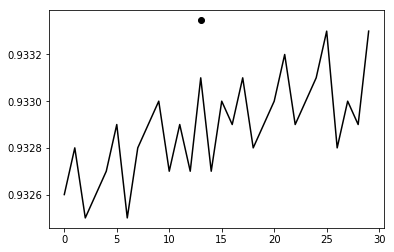

In [124]:

df=pd.DataFrame()
a=x[2493,:]
df = pd.DataFrame({'Date':b, 'y':a})
cp=TS.CP_mean(df,n_checkpoints=50,field='y',field_dt='Date',penalty_bs='AIC',penalty_wbs='SSIC',n_intervals=2500)
TS.CP_plot(df,x=cp['wbs'],field='y',kind='P')


In [101]:
a.max()+0.5*a.max()



1.40175

array([ True,  True, False, ..., False,  True, False])

In [193]:
x

array([[0.9302, 0.9302, 0.9302, ..., 0.93  , 0.93  , 0.93  ],
       [0.93  , 0.93  , 0.93  , ..., 0.9299, 0.9298, 0.9299],
       [0.9297, 0.9297, 0.9297, ..., 0.9295, 0.9294, 0.9294],
       ...,
       [1.4596, 1.4597, 1.4596, ..., 1.4594, 1.4592, 1.4594],
       [1.4593, 1.4594, 1.4592, ..., 1.4595, 1.4594, 1.4594],
       [1.459 , 1.4591, 1.4588, ..., 1.4589, 1.4588, 1.4588]])

In [194]:
#raggio=range(0,x.shape[0])

inizio=0


d=10

n=1000
p=0.7

%matplotlib inline
import matplotlib.pyplot as plt


k=inizio
for i in range(inizio,round(n*p)):
    

    df=pd.DataFrame()
    a=x[i,:]
    df = pd.DataFrame({'Date':b, 'y':a})
    cp=TS.CP_mean(df,n_checkpoints=50,field='y',field_dt='Date',penalty_bs='AIC',penalty_wbs='SSIC',n_intervals=2500)
    CP_plot(df,x=cp['wbs'],field='y',kind='P')
    plt.axis('off')
    
    if(y3[i]==-1):
        
        plt.savefig("dataset/training/down/X"+str(k)+".png",dpi=d)
        k+=1
        
        
    elif(y3[i]==1):
        plt.savefig("dataset/training/up/X"+str(k)+".png",dpi=d)
        k+=1
    else:
        plt.savefig("dataset/training/neutral/X"+str(k)+".png",dpi=d)
        k+=1
         
        



    plt.close("all")
    plt.clf()
    print(i)
    
    
for i in range(round(p*n),n):

    df=pd.DataFrame()
    a=x[i,:]
    df = pd.DataFrame({'Date':b, 'y':a})
    cp=TS.CP_mean(df,n_checkpoints=50,field='y',field_dt='Date',penalty_bs='AIC',penalty_wbs='SSIC',n_intervals=2500)
    TS.CP_plot(df,x=cp['wbs'],field='y',kind='V')
    plt.axis('off')
    
    if(y3[i]==-1):
        
        plt.savefig("dataset/testing/down/X"+str(k)+".png",dpi=d)
        k+=1



    elif(y3[i]==1):
        plt.savefig("dataset/testing/up/X"+str(k)+".png",dpi=d)
        k+=1
    else:
        plt.savefig("dataset/testing/neutral/X"+str(k)+".png",dpi=d)

        k+=1
 
        



    plt.close("all")
    plt.clf() 
    print(i)
    

NameError: name 'pd' is not defined

In [5]:

    
n=80000
p=0.8

#Initialising the CNN
classifier = Sequential()



# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu', init='he_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(layers.Dropout(0.65))

classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu', init='he_normal'))
classifier.add(layers.Dropout(0.5))

classifier.add(Dense(units = 2, activation = 'softmax', init='he_normal'))


epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
classifier.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model

#Drop-Based Learning Rate Schedule

#sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
#lrate = LearningRateScheduler(step_decay)
#callbacks_list = [lrate]
# Fit the model
#model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)


classifier.fit_generator(training_set,
                         steps_per_epoch = 10000,   #numero di immagini nel trainig set (tutte le osservazioni vengono passate durante ogni epoca)
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps = 4000,
                         verbose=1, use_multiprocessing=True)   #corrisponde al numero di immagini nel mio test set

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal")`
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu", kernel_initializer="he_normal")`
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, activation="softmax", kernel_initializer="he_normal")`


NameError: name 'training_set' is not defined

In [4]:
n=50000
p=0.8

#Initialising the CNN
classifier = Sequential()



# Step 1 - Convolution
classifier.add(Conv2D(24, (3, 3), input_shape = (60, 40, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(24, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(layers.Dropout(0.5))


classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 96, activation = 'relu'))
classifier.add(layers.Dropout(0.3))

classifier.add(Dense(units = 2, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(lr=0.1)
classifier.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])



# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

#applichiamo delle traformazioni casuacategorical_crossentropyli per aumentare il numero di esempi nel training
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (60, 40), #dimensione in ingresso alla cnn
                                                 color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False) #se la classe è binaria o meno 
                                                 
# NB per aumentare ulteriormente le perfomance si potrebbe aumentare la dimensione delle immagini in ingresso,
# tuttavia il tempo necessario all'esecuzione aumenta notevolemente                                                 

#ripetiamo la stessa cosa anche per il test set        
test_set = test_datagen.flow_from_directory('dataset/testing',
                                            target_size = (60, 40),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                           class_mode = 'categorical',
                                           shuffle=False)

classifier.fit_generator(training_set,
                         steps_per_epoch = 10000,   #numero di immagini nel trainig set (tutte le osservazioni vengono passate durante ogni epoca)
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 4000,verbose=1,workers=4)   #corrisponde al numero di immagini nel mio test set

Found 246051 images belonging to 2 classes.
Found 105806 images belonging to 2 classes.
Epoch 1/10
 1428/10000 [===>..........................] - ETA: 4:17 - loss: 0.6793 - acc: 0.5980

KeyboardInterrupt: 

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))




In [ ]:
n=12500
p=0.8

#Initialising the CNN
classifier = Sequential()



# Step 1 - Convolution
classifier.add(Conv2D(48, (3, 3), input_shape = (120, 40, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(48, (3, 3), activation = 'relu',kernel_initializer='he_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(layers.Dropout(0.4))


classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128+64, activation = 'relu',kernel_initializer='he_normal'))
classifier.add(layers.Dropout(0.5))

classifier.add(Dense(units = 3, activation = 'softmax'))

from keras.optimizers import SGD
opt = SGD(lr=0.0005)
classifier.compile(loss = "Cross Entropy", optimizer = opt, metrics=['accuracy'])



# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

#applichiamo delle traformazioni casuali per aumentare il numero di esempi nel training
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (60, 40), #dimensione in ingresso alla cnn
                                                 color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False) #se la classe è binaria o meno 
                                                 
# NB per aumentare ulteriormente le perfomance si potrebbe aumentare la dimensione delle immagini in ingresso,
# tuttavia il tempo necessario all'esecuzione aumenta notevolemente                                                 

#ripetiamo la stessa cosa anche per il test set        
test_set = test_datagen.flow_from_directory('dataset/testing',
                                            target_size = (60, 40),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                           class_mode = 'categorical',
                                           shuffle=False)

classifier.fit_generator(training_set,
                         steps_per_epoch = round(n*p),   #numero di immagini nel trainig set (tutte le osservazioni vengono passate durante ogni epoca)
                         epochs = 250,
                         validation_data = test_set,
                         validation_steps = round(n*(1-p)),verbose=1,workers=4)   #corrisponde al numero di immagini nel mio test set

In [14]:
import tensorflow as tf


def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

In [ ]:
n=12500
p=0.8


seed = 7

#Initialising the CNN
model = Sequential()

k=2

model.add(Conv2D(20, 5, 5, activation = 'relu', input_shape = (64, 48, 1)))
model.add(Conv2D(10, 5, 5, activation = 'relu'))
model.add(Conv2D(5, 5, 5, activation = 'relu'))
model.add(Conv2D(2, 5, 5, activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(5, 5, 5, activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D tensor for a fully connected layer to accept the input
model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Dense(2, activation = 'softmax')) #Last layer with one output per class

# The function to optimize is the cross entropy between the true label and the output (softmax) of the model
# We will use adadelta to do the gradient descent see http://cs231n.github.io/neural-networks-3/#ada
from keras.optimizers import SGD




# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

#applichiamo delle traformazioni casuali per aumentare il numero di esempi nel training
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (64, 48), #dimensione in ingresso alla cnn
                                                 color_mode="grayscale",
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False) #se la classe è binaria o meno 
                                                 
# NB per aumentare ulteriormente le perfomance si potrebbe aumentare la dimensione delle immagini in ingresso,
# tuttavia il tempo necessario all'esecuzione aumenta notevolemente                                                 

#ripetiamo la stessa cosa anche per il test set        
test_set = test_datagen.flow_from_directory('dataset/testing',
                                            target_size = (64, 48),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                           class_mode = 'categorical',
                                           shuffle=False)
#Time-Based Learning Rate Schedule


#epochs = 10
#learning_rate = 0.01
#decay_rate = learning_rate / epochs
#momentum = 0.8
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model

#Drop-Based Learning Rate Schedule



#keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
#keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
#keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
opt=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)







model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# learning schedule callback


model.fit_generator(training_set,
                         steps_per_epoch = 246051,   #numero di immagini nel trainig set (tutte le osservazioni vengono passate durante ogni epoca)
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 105806,
                         verbose=1)   #corrisponde al numero di immagini nel mio test set

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), activation="relu", input_shape=(64, 48, 1...)`
  if sys.path[0] == '':
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), activation="relu")`
  del sys.path[0]
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (5, 5), activation="relu")`
  
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (5, 5), activation="relu")`
  from ipykernel import kernelapp as app
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (5, 5), activation="relu")`


Found 246051 images belonging to 2 classes.
Found 105806 images belonging to 2 classes.
Epoch 1/10
238687/246051 [============================>.] - ETA: 29:53 - loss: 0.6632 - acc: 0.6226

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("mode0.9925_.68.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [45]:
3072/4

768.0

In [ ]:
import numpy as np


from keras.preprocessing import image


test_image = image.load_img('dataset/training/class2/X1.png', target_size = (60, 40),grayscale=True)
#il passo precedente non basta perchè in ingresso alla rete abbiamo un oggetto di dimensione 64x64x3 (immagine a colori)
#quindi usiamo il comando successivo per creare il vettore 3D
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)/255
result = classifier.predict(test_image)
training_set.class_indices
result=round(result[0][0])
if result == 1:
    prediction = 'up'
else:
    prediction = 'down'
    
prediction

In [ ]:
from keras.preprocessing import image


test_image = image.load_img('dataset/training/class2/X1.png', target_size = (60, 40),grayscale=True)
#il passo precedente non basta perchè in ingresso alla rete abbiamo un oggetto di dimensione 64x64x3 (immagine a colori)
#quindi usiamo il comando successivo per creare il vettore 3D
test_image = image.img_to_array(test_image)

In [ ]:
test_image.count()

In [ ]:
test_image = image.load_img('dataset/training/class2/X1.png', target_size = (60, 40),grayscale=True)
#il passo precedente non basta perchè in ingresso alla rete abbiamo un oggetto di dimensione 64x64x3 (immagine a colori)
#quindi usiamo il comando successivo per creare il vettore 3D
test_image = image.img_to_array(test_image)

In [ ]:
test_image.mean()

In [101]:
x=np.array([10])
x.mean()

10.0

In [ ]:
                                     #WEBSCRAPING



#----------------------------LIBRERIE--------------------------------------
import numpy as np                  #per array e esponenziali
import random                       #per generare numero casuale
import time                         #per ottenere la data corrente
import matplotlib.pyplot as plt     #per i plot
#import urlopen
import string
import urllib.request as urllib2    #per web scraper




#----------------------------DATI MODIFICARE (INPUT)-------------------------

tim=60                      #ogni quanti secondi prendere online il dato per creare file input

#----------------------------DATI NON MODIFICARE-------------------------
b=np.zeros(57)             #array contenente i dati raccolti online
a = np.zeros(shape=(60,57))
print("start")
for k in range(0,60):
 b=np.zeros(57)             #array contenente i dati raccolti online

 for d in range(0,57):
  #print ('Raccolta dati: ')+str(d+1)+('/')+str(r+n)
  time.sleep(tim)
  res = urllib2.urlopen('http://webrates.truefx.com/rates/connect.html?f=html')
  time_str = res.read().strip()
  type(time_str)
  t1=time_str[53:57]
  t2=time_str[66:69]
  t=t1+t2
  t=float(t)
  b[d]=t
  print(str(d+1)+": "+str(t))


 a[k,:]=b
 np.savetxt("A11.csv", a, delimiter=",")




In [238]:
import numpy as np
x=np.array([10,40,10,20,30,40,20,10,60,20,20,60])
np.histogram(x)

(array([3, 0, 4, 0, 1, 0, 2, 0, 0, 2]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]))

In [241]:
y=x*2
y

array([ 20,  80,  20,  40,  60,  80,  40,  20, 120,  40,  40, 120])